In [ ]:
!./darknet detector test "/content/gdrive/MyDrive/yolo_colab/cfg/obj.data" "/content/gdrive/MyDrive/yolo_colab/cfg/yolov3.cfg" "/content/gdrive/MyDrive/yolo_colab/backup/yolov3_last.weights" "/content/gdrive/MyDrive/yolo_colab/testimages/6.jpg" -dont_show

/bin/bash: ./darknet: Is a directory


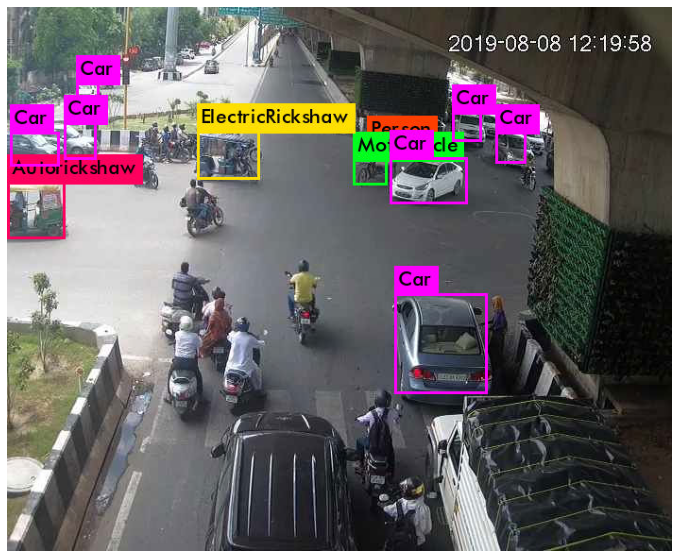

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('predictions.jpg')
cv2.imwrite("filenametest.jpg", image)
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
plt.savefig('foo.png')

In [ ]:
################################################## DONT RUN THIS  ####################################
# Install dependencies
!apt-get update
!apt-get upgrade

!apt-get install -y build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y libavcodec-dev libavformat-dev libswscale-d
!apt-get install -y libopencv-dev

!apt-get install -y g++-5
!apt-get install -y gcc-5

### STEP 0 Start here !!!!

In [7]:
!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-de

darknet  gdrive  sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 24.67 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.
/content/darknet
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64 

**STEP 2 just mount**


In [1]:
# This cell imports the drive library and mounts your Google Drive as a VM local drive. 
# You can access to your Drive files using this path "/content/gdrive/My Drive/"

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!rm -rf /content/darknet

In [ ]:
#!kill -9 -1

 Check CUDA release version

Nvidia CUDA is pre-installed on Colab notebooks. Now we'll check the version installed.

> _**BE AWARE:** In the future, the CUDA version will be upgraded on Colab and you should download another version of the cuDNN in the next step. Now is release 10.1 and we are using cuDNN (cudnn-10.1-linux-x64-v7.6.4.38.tgz) accordingly_

**KIND OF STEP #3**

In [2]:
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it.
!/usr/local/cuda/bin/nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


. Install cuDNN according to the current CUDA version


* ##Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 

  * Right now, because we have _**CUDA 10.1**_ preinstalled in Colab runtime, you need download [cuDNN v7.6.4 for CUDA v10.1](https://developer.nvidia.com/rdp/cudnn-archive#a-collapse764-101) - the file is cudnn-10.1-linux-x64-v7.6.4.38

* Drag that _**tgz**_ file into your _**yolo_colab/cuDNN**_ folder on Google Drive.



*Change the address to  cudnn-10.1 file _*

In [3]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
# Update the file name here if you have a newer version
!tar -xzvf /content/gdrive/MyDrive/yolo_colab/cuDNN/cudnn-10.1-linux-x64-v7.6.4.38.ga.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.4
cuda/lib64/libcudnn_static.a


In [4]:
!nvidia-smi

Sat Mar  6 10:29:50 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
#!git clone https://github.com/kriyeng/darknet
#%cd darknet
DONT USE THIS
# I have a branch where I have done the changes commented above
#!git checkout feature/google-colab

#Compile Darknet
#!make

#Copies the Darknet compiled version to Google drive
#!cp ./darknet /content/gdrive/My\ Drive/yolo_colab/bin/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 10068, done.
remote: Total 10068 (delta 0), reused 0 (delta 0), pack-reused 10068
Receiving objects: 100% (10068/10068), 10.13 MiB | 24.81 MiB/s, done.
Resolving deltas: 100% (6743/6743), done.


**STEP 4 MAKE_**   THIS WILL CREATE A DARKNET FILE IN THE DARKNET FOLDER, NO NOT THE DARNET.PY FILE JUST DARKNET

In [8]:
!cd /content/darknet && make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## STEP 5. Copying files from  Google Drive

Here we will just copy down all the files needed for training from our yolo_colab folder on Google Drive.

- `yolo_colab/cfg/` contains config files
- `yolo_colab/img/` contains training images (`.jpg`) and bounding box (`.txt`) files


**DO THIS IT WILL BE FUN THEY SAID**

In [9]:
# Makes a dir for yolo_colab and move there
%%capture
!mkdir yolo_colab
%cd yolo_colab

# Copy the Darknet compiled version to the VM local drive
!cp /content/gdrive/My\ Drive/yolo_colab/bin/darknet ./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet

# copy yolov3 config files and images to VM local drive
!cp /content/gdrive/My\ Drive/yolo_colab/cfg/* .
!tar -xzvf /content/gdrive/My\ Drive/yolo_colab/img.tar.gz

## STEP 6. Download initial weights

Finally, we want to start training with some pretrained weights to jumpstart our training. We download these from the YOLO author's [website](https://pjreddie.com/darknet/).


DO THIS IF STARTING FRESH, OR YOU CAN USE TRAINED WEIGHTS LIKE I DID. JUST PROPERLY MENTION THE PATH. 

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

In [10]:
!pwd

/content/darknet/yolo_colab


In [11]:
%cd /content/darknet

/content/darknet


In [ ]:
#!./darknet detector train "/content/darknet/yolo_colab/obj.data" "/content/darknet/yolo_colab/yolov3.cfg" "/content/gdrive/MyDrive/yolo_colab/backup/yolov3_best.weights" -dont_show 

In [ ]:
#!cd /content/gdrive/MyDrive/Docs/darknet && make

## Step 7. Train your model!

When you execute the following command, your model will start training.

You will have a log line per epoch. On each iteration you will see how your training is going.

This cell should run for several hours until your session on Google Colab times out or you quit the program.  

Darknet copies a backup of your trained weights every 100 iterations. The `obj.data` file sets the trained weights to be stored in the `yolo_colab/backup/yolov3_last.weights` folder on Google Drive. This will be the output model weights file that's used ot detect objects.

> **When this script is done, you can test the last output model weights using the `DarknetYOLOTest.ipynb` notebook.**

**TRAIN **

In [ ]:
!./darknet detector train "/content/darknet/yolo_colab/obj.data" "/content/darknet/yolo_colab/yolov3.cfg" "/content/gdrive/MyDrive/yolo_colab/backup/yolov3_19000.weights" > /content/gdrive/MyDrive/yolo_colab/check/train.log  -dont_show   -map  -clear

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.001608, iou_loss = 0.000000, total_loss = 0.001608 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.687288), count: 1, class_loss = 0.951411, iou_loss = 0.270779, total_loss = 1.222190 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.011473, iou_loss = 0.000000, total_loss = 0.011473 
 total_bbox = 1092, rewritten_bbox = 0.091575 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.858120), count: 2, class_loss = 0.200903, iou_loss = 0.218606, total_loss = 0.419509 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.733171), count: 9, class_loss = 6.456552, iou_loss = 2.642462, total_loss = 9.099014 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00)

**THIS SHOULD BE THE FIRST LINE WHEN YOU START TRAINING, IF NOT SOMETHINGS IS WRONG**
CUDA-version: 11000 (11020), cuDNN: 7.6.4, GPU count: 1  


In [ ]:
#cd /content/gdrive/MyDrive/Docs/darknet && sudo chmod +x darknet &&

In [ ]:
#!cd /content/gdrive/MyDrive/bin/darknet && sudo chmod +x darknet && ./darknet detector train "/content/gdrive/MyDrive/yolo_colab/cfg/obj.data" "/content/gdrive/MyDrive/yolo_colab/cfg/yolov3.cfg" "/content/gdrive/MyDrive/yolo_colab/backup/yolov3_9000.weights" 2>&1 > log.txt

In [ ]:
# detector train  "/content/darknet/yolo_colab/obj.data" "/content/darknet/yolo_colab/yolov3.cfg" "/content/gdrive/MyDrive/yolo_colab/backup/yolov3_9000.weights" -dont_show -mjpeg_port 8090 -map